In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#### Generate simulated data D, distributed exponentially with true decay constant lambda_true = 5 cm

In [ ]:
#np.random.seed(200)

In [2]:
D = np.empty(10000)
j = 0
z = np.exp(-1 / 5) - np.exp(-20 / 5)
while j < len(D):
    rand_x = np.random.exponential(5) / z
    if rand_x <= 20 and rand_x >= 1:
        D[j] = rand_x
        j += 1 

In [3]:
D

array([18.42459253,  1.60473555,  5.63730918, ..., 14.76981556,
       12.86890549,  1.10479738])

In [3]:
def get_P_l(lambda_cur, lambda_mean, sigma):
    return np.exp(-(lambda_cur-lambda_mean)**2/(2*sigma**2))/(2*np.pi*sigma**2)**(0.5)

In [4]:
def get_P_xl(lambda_cur, N, data):
    z_l = np.exp(-1 / lambda_cur) - np.exp(-20 / lambda_cur)
    return np.exp(-np.sum(data[:N]) / lambda_cur) / ((lambda_cur * z_l) ** N)

In [5]:
def get_P_xl_alt(lambda_cur, N, data):
    z_l = np.exp(-1 / lambda_cur) - np.exp(-20 / lambda_cur)
    return np.exp(N*np.log(1/(lambda_cur*z_l)) - np.sum(data[:N])/lambda_cur)

In [7]:
# fig, ax = plt.subplots(1, 3, figsize = (14,4))
# # fig.suptitle('bla', fontsize = 16)

# ax[0].plot(lam, P_xl, '.')
# ax[0].set_title('P_xl')
# ax[1].plot(lam, P_l, '.')
# ax[1].set_title('P_l')
# ax[2].plot(lam, P_lx, '.')
# ax[2].set_title('P_lx')

# #fig.legend()

In [16]:
lam = np.arange(1,20,0.1)
l_prior = 8
sigma_prior = 4
N_range = range(1,1026)

prior = np.array([get_P_l(l, l_prior, sigma_prior) for l in lam])
posteriors = np.empty([len(N_range), len(lam)]) 

for N in N_range:
    P_xl = np.empty(len(lam))
    P_lx = np.empty(len(lam))
    i = 0
    for l in lam:
        P_xl[i] = get_P_xl_alt(l, N, D)
        P_lx[i] = P_xl[i]* prior[i]
        i +=1
    P_lx = P_lx / np.trapz(P_lx, lam)
    
    posteriors[N-1] = P_lx
    prior = P_lx

/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


([<matplotlib.axis.XTick at 0x1109427b8>,
 <a list of 20 Text xticklabel objects>)

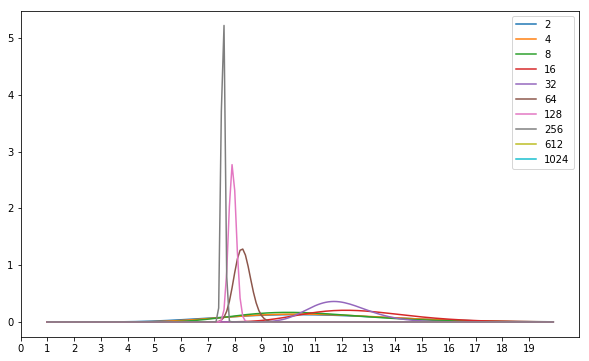

In [17]:
plt.figure(figsize = (10,6))
selected_N = [2,4,8,16,32,64,128,256,612,1024]
for N in selected_N:
    plt.plot(lam, posteriors[N-1], label = N)
plt.legend()
plt.xticks(range(0,20,1))
#plt.ylim(0,3)

#### Plot the mode of posterior and its width as a function of N

In [10]:
modes = []
stds = []
for distr in posteriors:
    mode = lam[distr.argmax()]
    integrand = [((l - mode)**2) *  distr[key] for key, l in enumerate(lam)]
    std = (np.trapz(integrand, lam))**(0.5)
    modes.append(mode)
    stds.append(std)

# print(modes)
# print(stds)

Text(0.5, 1.0, 'STD of the posterior as a function of N')

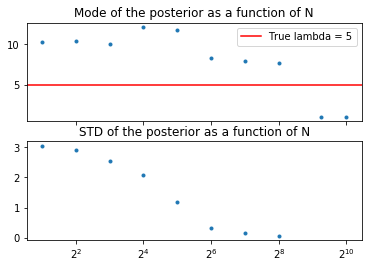

In [11]:
fig, ax = plt.subplots(2, 1, figsize = (6,4), sharex = True)

ax[0].plot(selected_N, [modes[N-1] for N in selected_N], '.')
ax[0].axhline(y=5, color='r', linestyle='-', label = 'True lambda = 5')
ax[0].set_xscale('log', basex=2)
#ax[0].set_yticks(range(4,12,2))
ax[0].set_title('Mode of the posterior as a function of N')
ax[0].legend()

ax[1].plot(selected_N, [stds[N-1] for N in selected_N], '.')
ax[1].set_xscale('log', basex=2)
ax[1].set_title('STD of the posterior as a function of N')

#ax[1].set_yticks(range(4,12,1))

#### How many datapoints are needed to clain that the true value of lambda is less than 8cm with 95% certainty?

In [12]:
n_thr = 0
for distr in posteriors:
    x = lam[lam <=8]
    distr = distr[:len(x)]
    n_thr += 1
    if np.trapz(distr, x) >= 0.95:
        break
print(n_thr)

219


## Many simulations!

In [12]:
lambda_true = 5
total_N = 2000
j = 0
z = np.exp(-1 / 5) - np.exp(-20 / 5)
N_sim = 10

lam = np.arange(1,20,0.1)
l_prior = 8
sigma_prior = 4
N_range = range(1,1026)

all_post = np.empty([N_sim, len(N_range), len(lam)]) 

for simN in range(N_sim):
    data = np.empty(total_N)
    while j < total_N:
        rand_x = np.random.exponential(lambda_true) / z
        if rand_x <= 20 and rand_x >= 1:
            data[j] = rand_x
            j += 1 
    
    prior = np.array([get_P_l(l, l_prior, sigma_prior) for l in lam])
    posteriors = np.empty([len(N_range), len(lam)]) 
    for N in N_range:
        P_xl = np.empty(len(lam))
        P_lx = np.empty(len(lam))
        i = 0
        for l in lam:
            P_xl[i] = get_P_xl_alt(l, N, data)
            P_lx[i] = P_xl[i]* prior[i]
            i +=1
        P_lx = P_lx / np.trapz(P_lx, lam)

        posteriors[N-1] = P_lx
        prior = P_lx
        
    all_post[simN] = posteriors

/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce


In [13]:
all_modes = []
all_stds = []
for sim in all_post:
    modes = []
    stds = []
    for distr in sim:
        mode = lam[distr.argmax()]
        integrand = [((l - mode)**2) *  distr[key] for key, l in enumerate(lam)]
        std = (np.trapz(integrand, lam))**(0.5)
        modes.append(mode)
        stds.append(std)
    all_modes.append(modes)
    all_stds.append(stds)

#print(all_modes)
#print(all_stds)

([<matplotlib.axis.XTick at 0x11028dcf8>,
 <a list of 20 Text xticklabel objects>)

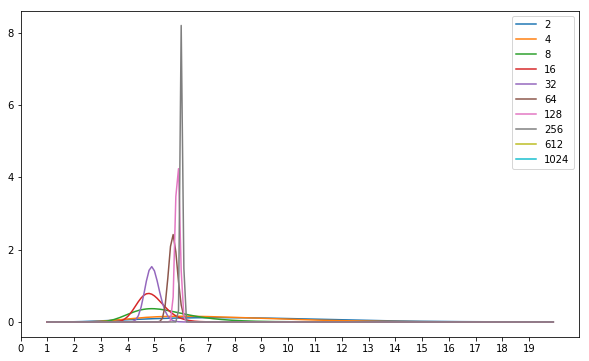

In [14]:
plt.figure(figsize = (10,6))
selected_N = [2,4,8,16,32,64,128,256,612,1024]
for N in selected_N:
    plt.plot(lam, all_post[0][N-1], label = N)
plt.legend()
plt.xticks(range(0,20,1))
#plt.ylim(0,3)

In [15]:
all_modes_mean = np.mean(all_modes, axis = 0)
all_modes_std = np.std(all_modes, axis = 0)
all_stds_mean = np.mean(all_stds, axis = 0)
all_stds_std = np.std(all_stds, axis = 0)

In [16]:
print(all_modes_mean)
print(all_stds_mean)

[1.   1.64 1.6  ... 1.   1.   1.  ]
[6.30121954        nan        nan ...        nan        nan        nan]


Text(0.5, 1.0, 'STD of the posterior as a function of N')

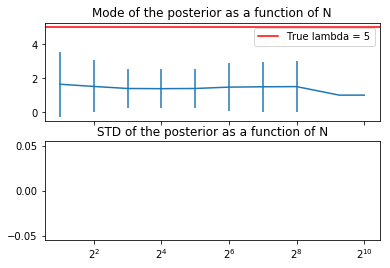

In [17]:
fig, ax = plt.subplots(2, 1, figsize = (6,4), sharex = True)

ax[0].errorbar(x = selected_N, y = [all_modes_mean[N-1] for N in selected_N], 
               yerr = [all_modes_std[N-1] for N in selected_N], linestyle = '-')
ax[0].axhline(y=5, color='r', linestyle='-', label = 'True lambda = 5')
ax[0].set_xscale('log', basex=2)
#ax[0].set_yticks(range(4,12,2))
ax[0].set_title('Mode of the posterior as a function of N')
ax[0].legend()

ax[1].errorbar(x = selected_N, y = [all_stds_mean[N-1] for N in selected_N], yerr = [all_stds_std[N-1] for N in selected_N])
ax[1].set_xscale('log', basex=2)
ax[1].set_title('STD of the posterior as a function of N')

#ax[1].set_yticks(range(4,12,1))

In [23]:
#How many datapoints are needed to clain that the true value of lambda is less than 8cm with 95% certainty?
x = lam[lam <=8]
n_thr = [0]*N_sim
i = 0
for sim in all_post:
    for distr in sim:
        distr = distr[:len(x)]
        n_thr[i] += 1
        if np.trapz(distr, x) >= 0.95:
            break
    i += 1
print(n_thr, np.mean(n_thr))

[8, 2, 2, 1025, 1025, 2, 1025, 2, 1025, 2] 411.8
